In [5]:
#original program by Joseph Lee Wei En

import tensorflow as tf
import keras
import pandas
import sklearn
import matplotlib
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

df = pd.read_csv('housepricedata.csv')
#convert to array
dataset = df.values

#split dataset into input features and features to predict
X = dataset[:,0:10]

Y = dataset[:,10]

#scales dataset so all functions are between 1 and 0
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

#split dataset
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

#split between validation and test
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#begin training
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))



Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6903 - accuracy: 0.4912 - val_loss: 0.6821 - val_accuracy: 0.5616
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.5479 - val_loss: 0.6744 - val_accuracy: 0.5799
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.5871 - val_loss: 0.6679 - val_accuracy: 0.6164
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6686 - accuracy: 0.6448 - val_loss: 0.6618 - val_accuracy: 0.6347
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6627 - accuracy: 0.6448 - val_loss: 0.6559 - val_accuracy: 0.6575
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6569 - accuracy: 0.6497 - val_loss: 0.6502 - val_accuracy: 0.6986
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.7094 - val_loss: 0.6443 - val_accuracy: 0.7078
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3295 - accuracy: 0.8767 - val_loss: 0.3457 - val_accuracy: 0.8721
Epoch 60/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3272 - accuracy: 0.8728 - val_loss: 0.3441 - val_accuracy: 0.8721
Epoch 61/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3251 - accuracy: 0.8767 - val_loss: 0.3424 - val_accuracy: 0.8721
Epoch 62/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3230 - accuracy: 0.8796 - val_loss: 0.3408 - val_accuracy: 0.8721
Epoch 63/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3211 - accuracy: 0.8757 - val_loss: 0.3396 - val_accuracy: 0.8721
Epoch 64/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8816 - val_loss: 0.3376 - val_accuracy: 0.8813
Epoch 65/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3179 - accuracy: 0.8787 - val_loss: 0.3366 - val_accuracy: 0.8721
Epoch 

In [6]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.2491 - accuracy: 0.9041


0.9041095972061157

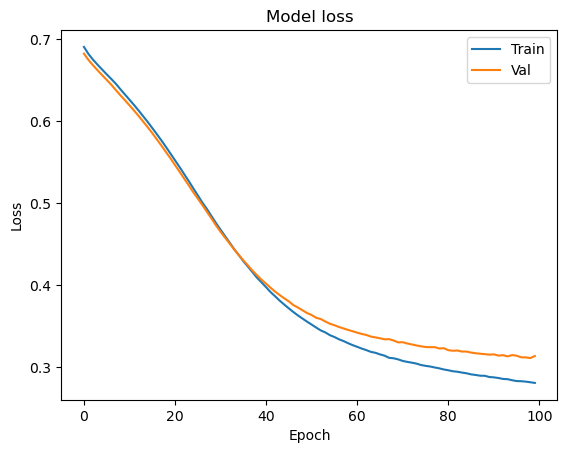

In [7]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

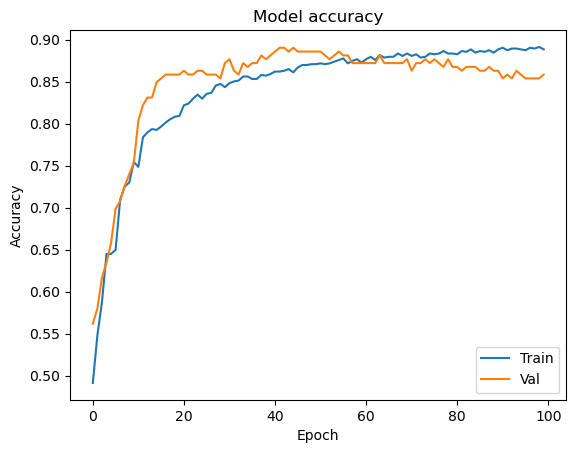

In [8]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [9]:
#purposefully overfitted model
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 0.4869 - accuracy: 0.7642 - val_loss: 0.3815 - val_accuracy: 0.8402
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3401 - accuracy: 0.8591 - val_loss: 0.3359 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3145 - accuracy: 0.8591 - val_loss: 0.3067 - val_accuracy: 0.8904
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2859 - accuracy: 0.8796 - val_loss: 0.3057 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2837 - accuracy: 0.8787 - val_loss: 0.3110 - val_accuracy: 0.8676
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2562 - accuracy: 0.8953 - val_loss: 0.2787 - val_accuracy: 0.8630
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2459 - accuracy: 0.8982 - val_loss: 0.3016 - val_accuracy: 0.8539
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1519 - accuracy: 0.9344 - val_loss: 0.5676 - val_accuracy: 0.8721
Epoch 60/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1431 - accuracy: 0.9286 - val_loss: 0.5972 - val_accuracy: 0.8676
Epoch 61/100
32/32 [==============================] - 0s 7ms/step - loss: 0.1446 - accuracy: 0.9364 - val_loss: 0.5562 - val_accuracy: 0.8630
Epoch 62/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1501 - accuracy: 0.9286 - val_loss: 0.5280 - val_accuracy: 0.8767
Epoch 63/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1492 - accuracy: 0.9305 - val_loss: 0.5976 - val_accuracy: 0.8767
Epoch 64/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1621 - accuracy: 0.9295 - val_loss: 0.4758 - val_accuracy: 0.8813
Epoch 65/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1587 - accuracy: 0.9276 - val_loss: 0.5223 - val_accuracy: 0.8767
Epoch 

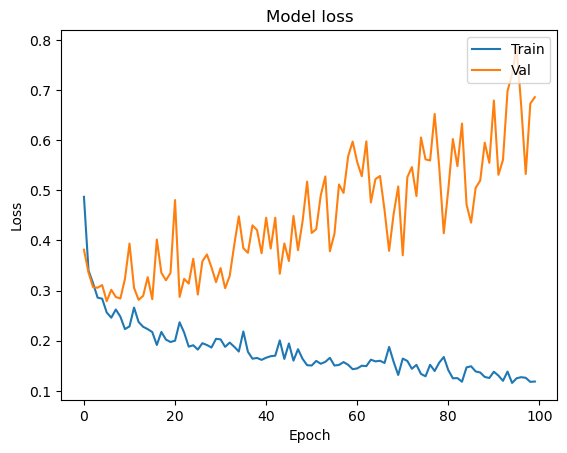

In [10]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

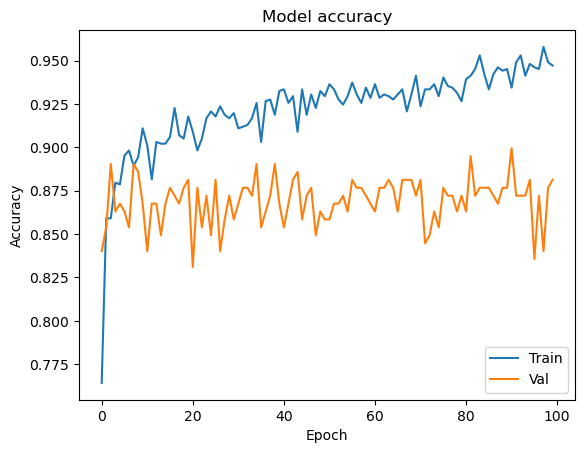

In [11]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [20]:
#reduce overfitting
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 14s 81ms/step - loss: 14.2359 - accuracy: 0.6624 - val_loss: 3.8776 - val_accuracy: 0.8858
Epoch 2/100
32/32 [==============================] - 1s 30ms/step - loss: 1.6627 - accuracy: 0.8229 - val_loss: 0.7634 - val_accuracy: 0.7671
Epoch 3/100
32/32 [==============================] - 1s 29ms/step - loss: 0.6131 - accuracy: 0.8356 - val_loss: 0.5052 - val_accuracy: 0.8995
Epoch 4/100
32/32 [==============================] - 1s 36ms/step - loss: 0.5095 - accuracy: 0.8630 - val_loss: 0.4631 - val_accuracy: 0.8950
Epoch 5/100
32/32 [==============================] - 1s 34ms/step - loss: 0.5065 - accuracy: 0.8601 - val_loss: 0.4998 - val_accuracy: 0.8950
Epoch 6/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5467 - accuracy: 0.8258 - val_loss: 0.5184 - val_accuracy: 0.8539
Epoch 7/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5048 - accuracy: 0.8689 - val_loss: 0.4496 - val_accuracy: 0.8950
Epoc

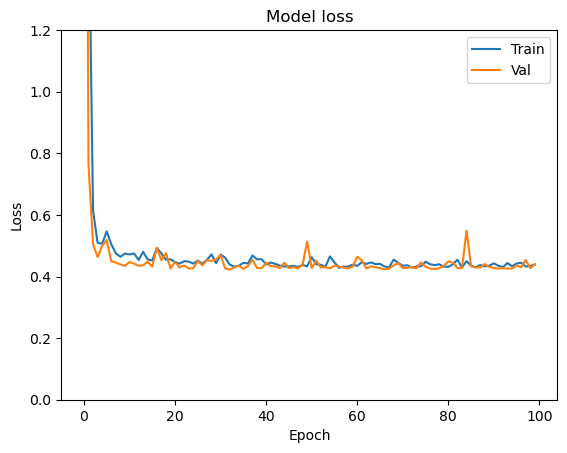

In [21]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

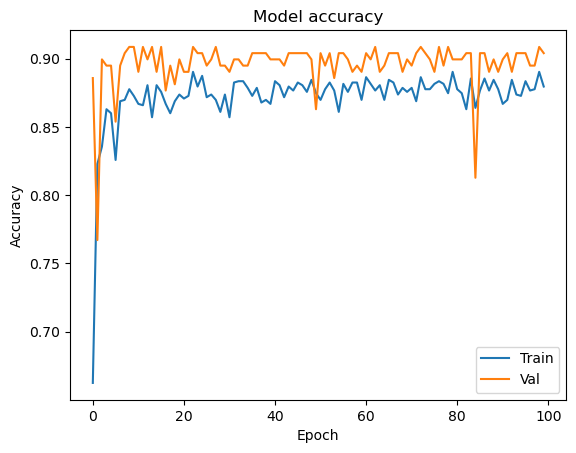

In [22]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()